In [ ]:
# Hepatitis Mortality Prediction

'''
Workflow:

+ Data Prep
+ EDA
+ Feature Selection
+ Build Model
+ Interpretation
+ Serialization
+ Production with streamlite/Flask

'''

'\nWorkflow:\n\n+ Data Prep\n+ EDA\n+ Feature Selection\n+ Build Model\n+ Interpretation\n+ Serialization\n+ Production with streamlite/Flask\n\n'

In [92]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from google.colab import files

In [93]:
# Load data

files.upload()

Saving hepatitis.data to hepatitis (2).data


{'hepatitis.data': b'2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1\n2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1\n2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1\n2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1\n2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1\n2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1\n1,51,1,1,2,1,2,1,2,2,1,1,2,2,?,?,?,?,?,1\n2,23,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,?,?,?,1\n2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.70,?,48,4.4,?,1\n2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,120,3.9,?,1\n2,39,1,1,1,2,2,2,1,1,2,2,2,2,1.30,78,30,4.4,85,1\n2,32,1,2,1,1,2,2,2,1,2,1,2,2,1.00,59,249,3.7,54,1\n2,41,1,2,1,1,2,2,2,1,2,2,2,2,0.90,81,60,3.9,52,1\n2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.20,57,144,4.9,78,1\n2,47,1,1,1,2,2,2,2,2,2,2,2,2,?,?,60,?,?,1\n2,38,1,1,2,1,1,1,2,2,2,2,1,2,2.00,72,89,2.9,46,1\n2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.20,102,53,4.3,?,1\n2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.60,62,166,4.0,63,1\n2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.70,53,42,4.1,85,2\n2,38,1,1,1,2,2,2,1,1,2,2,2,2,0.70,70,28,4.2,62,1\n2,

### Attribute Information:

1. Class: DIE, LIVE
2. AGE: 10, 20, 30, 40, 50, 60, 70, 80
3. SEX: male, female
4. STEROID: no, yes
5. ANTIVIRALS: no, yes
6. FATIGUE: no, yes
7. MALAISE: no, yes
8. ANOREXIA: no, yes
9. LIVER BIG: no, yes
10. LIVER FIRM: no, yes
11. SPLEEN PALPABLE: no, yes
12. SPIDERS: no, yes
13. ASCITES: no, yes
14. VARICES: no, yes
15. BILIRUBIN: 0.39, 0.80, 1.20, 2.00, 3.00, 4.00
16. ALK PHOSPHATE: 33, 80, 120, 160, 200, 250
17. SGOT: 13, 100, 200, 300, 400, 500,
18. ALBUMIN: 2.1, 3.0, 3.8, 4.5, 5.0, 6.0
19. PROTIME: 10, 20, 30, 40, 50, 60, 70, 80, 90
20. HISTOLOGY: no, yes




In [94]:
df = pd.read_csv('hepatitis.data')
df.head()

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1


In [101]:
col_names = ["Class",
"AGE",
"SEX",
"STEROID",     
"ANTIVIRALS",     
"FATIGUE",     
"MALAISE",     
"ANOREXIA",     
"LIVER BIG",    
"LIVER FIRM",    
"SPLEEN PALPABLE",    
"SPIDERS",    
"ASCITES",    
"VARICES",    
"BILIRUBIN",
"ALK PHOSPHATE",
"SGOT",
"ALBUMIN",
"PROTIME",
"HISTOLOGY" ]

In [104]:
df = pd.read_csv('hepatitis.data', names=col_names)

In [106]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [110]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


In [111]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid            object
antivirals          int64
fatigue            object
malaise            object
anorexia           object
liver_big          object
liver_firm         object
spleen_palpable    object
spiders            object
ascites            object
varices            object
bilirubin          object
alk_phosphate      object
sgot               object
albumin            object
protime            object
histology           int64
dtype: object

In [112]:
# Replace ? to 0

df = df.replace('?', 0)
df.head()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,0,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,0,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,0,1
3,2,31,1,0,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,0,200,4.0,0,1


In [113]:
# Subject columns count

sum(df.dtypes == 'object')

15

In [114]:
df.columns[df.dtypes == 'object']

Index(['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices', 'bilirubin',
       'alk_phosphate', 'sgot', 'albumin', 'protime'],
      dtype='object')

In [115]:
# Convert data type
df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices','alk_phosphate', 'sgot', 'protime']] = df[['steroid', 'fatigue', 'malaise', 'anorexia', 'liver_big', 'liver_firm',
       'spleen_palpable', 'spiders', 'ascites', 'varices','alk_phosphate', 'sgot', 'protime']].astype(int)

In [116]:
df.dtypes

class               int64
age                 int64
sex                 int64
steroid             int64
antivirals          int64
fatigue             int64
malaise             int64
anorexia            int64
liver_big           int64
liver_firm          int64
spleen_palpable     int64
spiders             int64
ascites             int64
varices             int64
bilirubin          object
alk_phosphate       int64
sgot                int64
albumin            object
protime             int64
histology           int64
dtype: object

In [117]:
df[['bilirubin', 'albumin']] = df[['bilirubin', 'albumin']].astype(float)

In [118]:
df.dtypes

class                int64
age                  int64
sex                  int64
steroid              int64
antivirals           int64
fatigue              int64
malaise              int64
anorexia             int64
liver_big            int64
liver_firm           int64
spleen_palpable      int64
spiders              int64
ascites              int64
varices              int64
bilirubin          float64
alk_phosphate        int64
sgot                 int64
albumin            float64
protime              int64
histology            int64
dtype: object

In [119]:
df.shape

(155, 20)

In [120]:
df.isnull().sum()

class              0
age                0
sex                0
steroid            0
antivirals         0
fatigue            0
malaise            0
anorexia           0
liver_big          0
liver_firm         0
spleen_palpable    0
spiders            0
ascites            0
varices            0
bilirubin          0
alk_phosphate      0
sgot               0
albumin            0
protime            0
histology          0
dtype: int64

In [121]:
# EDA
## Descriptive Analysis

df.describe()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1.793548,41.200000,1.103226,1.496774,1.845161,1.341935,1.593548,1.780645,1.709677,1.470968,1.741935,1.606452,1.806452,1.819355,1.372258,85.619355,83.677419,3.423226,35.116129,1.451613
std,0.406070,12.565878,0.305240,0.514393,0.362923,0.489350,0.505769,0.430508,0.580727,0.627401,0.507588,0.552406,0.471207,0.462503,1.219992,62.061686,89.527688,1.318343,35.221923,0.499266
min,1.000000,7.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,32.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.700000,51.000000,30.500000,3.050000,0.000000,1.000000
50%,2.000000,39.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,84.000000,55.000000,3.900000,35.000000,1.000000
75%,2.000000,50.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.500000,119.500000,99.000000,4.200000,65.000000,2.000000
max,2.000000,78.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000,295.000000,648.000000,6.400000,100.000000,2.000000


In [122]:
# Value count
# 1 DIE
# 2 LIVE

df['class'].value_counts()

2    123
1     32
Name: class, dtype: int64

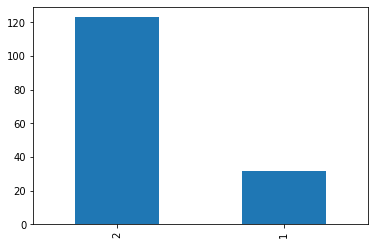

In [123]:
target_label = {'DIE':1, 'LIVE':2}

# Plot

df['class'].value_counts().plot(kind='bar')

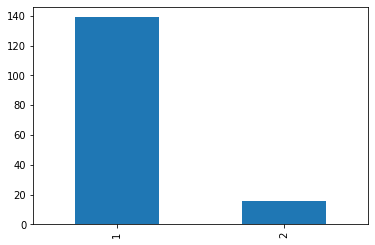

In [124]:
# df['sex'].value_counts() / more male dominant
df['sex'].value_counts().plot(kind='bar')

In [125]:
df.groupby(['age', 'sex']).size()
# df['age'].value_counts().plot(kind='bar')

age  sex
7    1      1
20   1      2
     2      1
22   1      1
     2      1
23   1      4
24   1      2
25   1      2
     2      1
26   2      1
27   1      4
28   1      4
     2      1
30   1      7
     2      1
31   1      4
32   1      4
33   1      3
34   1      6
     2      2
35   1      2
36   1      7
37   1      5
38   1      8
39   1      6
40   1      3
41   1      2
     2      1
42   1      5
43   1      1
44   1      5
45   1      4
     2      1
46   1      1
47   1      4
48   1      2
49   1      3
50   1      5
     2      1
51   1      6
52   1      3
53   2      1
54   1      5
56   1      3
57   1      2
58   1      1
     2      1
59   1      1
60   1      1
61   1      3
62   1      1
     2      1
64   1      1
65   1      1
66   1      1
67   2      1
69   2      1
70   1      1
72   1      1
78   1      1
dtype: int64

In [126]:
# Build frequency distribution data instead above

labels = ['< 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70 <']
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

freq_df = df.groupby(pd.cut(df['age'], bins=bins, labels=labels)).size()
freq_df

age
< 10      1
10-20     3
20-30    29
30-40    50
40-50    35
50-60    24
60-70    11
70 <      2
dtype: int64

In [127]:
freq_df = freq_df.reset_index(name='counts')

In [128]:
freq_df

,age,counts
0,< 10,1
1,10-20,3
2,20-30,29
3,30-40,50
4,40-50,35
5,50-60,24
6,60-70,11
7,70 <,2


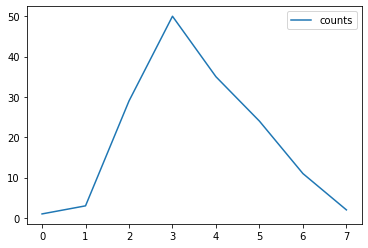

In [129]:
freq_df.plot(kind='line')


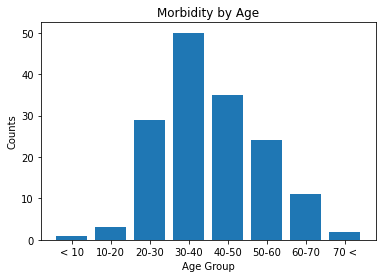

In [130]:
plt.bar(freq_df['age'], freq_df['counts'])
plt.ylabel('Counts')
plt.xlabel('Age Group')
plt.title('Morbidity by Age')
plt.show()

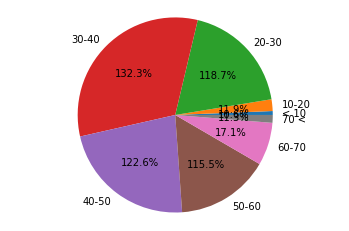

In [131]:
# Try out pie chart

labels = ['< 10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70 <']
fig1, ax1 = plt.subplots()
ax1.pie(freq_df['counts'], labels=labels, autopct='1%.1f%%')
ax1.axis('equal')
plt.show()

In [132]:
# Check for outliers

## boxplot(uni var) and scatterplot(nulti var), Z-score, IQR interquartile range 

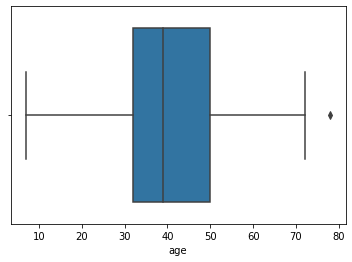

In [133]:
# Using boxplot()

sn.boxplot(df['age'])

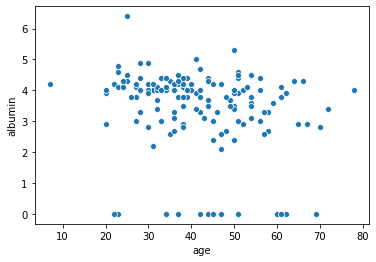

In [134]:
# Scatterplot

sn.scatterplot(df['age'], df['albumin'])

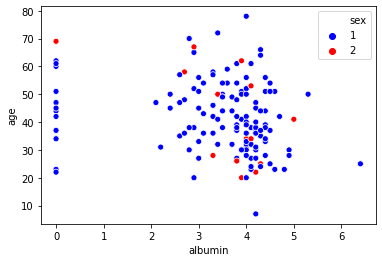

In [135]:
sn.scatterplot(y=df['age'], x=df['albumin'], hue=df['sex'], palette=['blue', 'red'], data=df)

#### Interquartile Range(IQR)
 + H-spread/Mid-spread
 + Measures the statistical dispersion/spread
 + IQR = Quantile 3(75%) - Quantile 1(25%)

In [136]:
q1 = df.quantile(.25)
q3 = df.quantile(.75)

In [137]:
IQR = q3 - q1
IQR

class               0.00
age                18.00
sex                 0.00
steroid             1.00
antivirals          0.00
fatigue             1.00
malaise             1.00
anorexia            0.00
liver_big           0.00
liver_firm          1.00
spleen_palpable     0.00
spiders             1.00
ascites             0.00
varices             0.00
bilirubin           0.80
alk_phosphate      68.50
sgot               68.50
albumin             1.15
protime            65.00
histology           1.00
dtype: float64

In [138]:
 # Get data points that are outliers

 (df < (q1-1.5 * IQR)) |  (df < (q3+1.5 * IQR))

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,False,True,False,True,False,True,True,False,True,True,False,True,False,False,True,True,True,True,True,True
1,False,True,False,True,False,True,True,False,True,True,False,True,False,False,True,True,True,True,True,True
2,False,False,False,True,False,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
3,False,True,False,True,True,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
4,False,True,False,True,False,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,False,True,False,True,True,True,False,True,False,True,True,True,False,True,False,True,True,True
151,False,True,False,True,False,True,True,False,False,True,False,True,False,False,True,True,True,True,True,True
152,False,True,False,True,False,True,True,False,True,True,False,True,False,False,True,True,True,True,True,True
153,False,True,False,True,False,True,True,False,False,True,True,True,False,True,True,True,True,True,True,True


In [139]:
# Now remove/clean the outliers above

df_no_outlier = df[~((df < (q1 -1.5 * IQR)) | (df >(q3 + 1.5 * IQR))).any(axis=1)]

In [140]:
df_no_outlier

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,200,4.0,0,1
5,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1
8,2,39,1,2,2,1,2,2,2,1,2,2,2,2,0.7,0,48,4.4,0,1
9,2,30,1,2,2,2,2,2,2,2,2,2,2,2,1.0,0,120,3.9,0,1
13,2,30,1,2,2,1,2,2,2,1,2,2,2,2,2.2,57,144,4.9,78,1
16,2,66,1,2,2,1,2,2,2,2,2,2,2,2,1.2,102,53,4.3,0,1
17,2,40,1,1,2,1,2,2,2,1,2,2,2,2,0.6,62,166,4.0,63,1
18,2,38,1,2,2,2,2,2,2,2,2,2,2,2,0.7,53,42,4.1,85,2
22,2,31,1,2,2,2,2,2,2,2,2,2,2,2,1.0,85,20,4.0,100,1
23,2,42,1,2,2,2,2,2,2,2,2,2,2,2,0.9,60,63,4.7,47,1


In [141]:
print(df.shape)
print(df_no_outlier.shape)

(155, 20)
(43, 20)


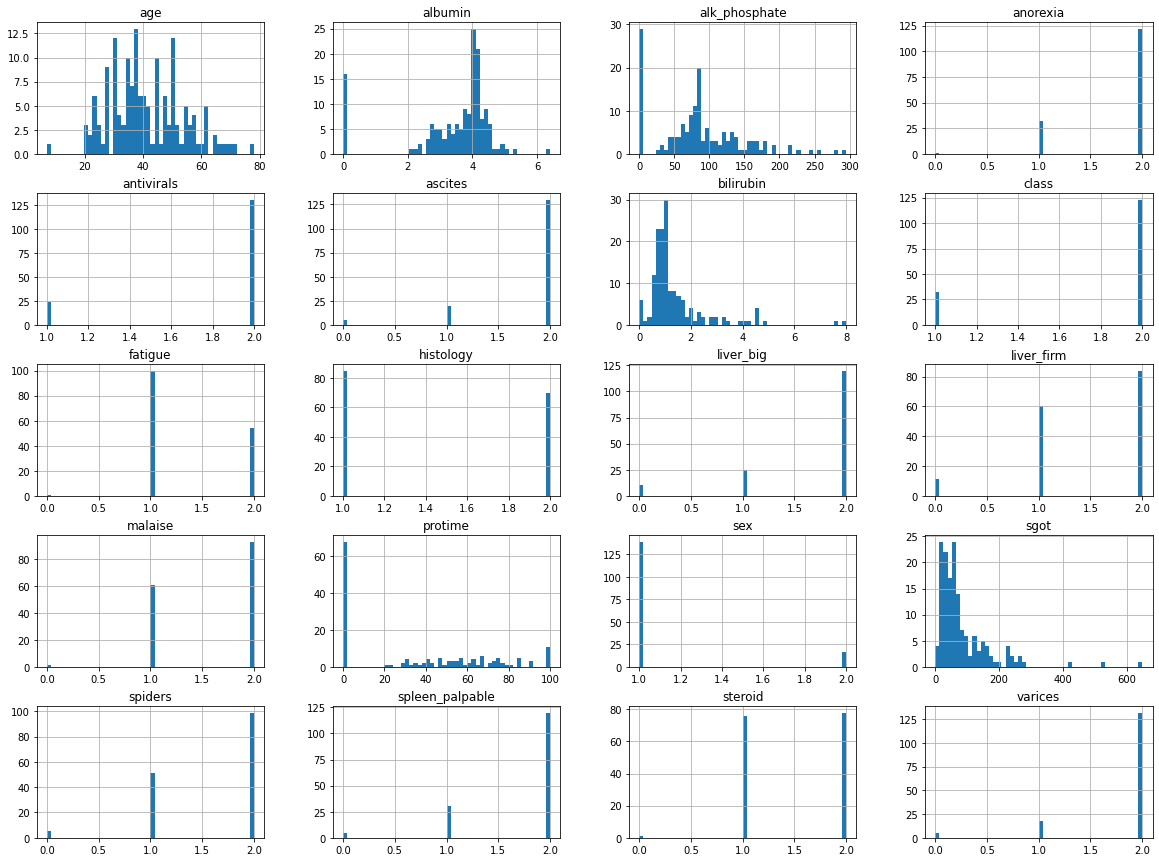

In [142]:
# Plot distribution of the data

df.hist(bins=50, figsize=(20,15))
plt.show()

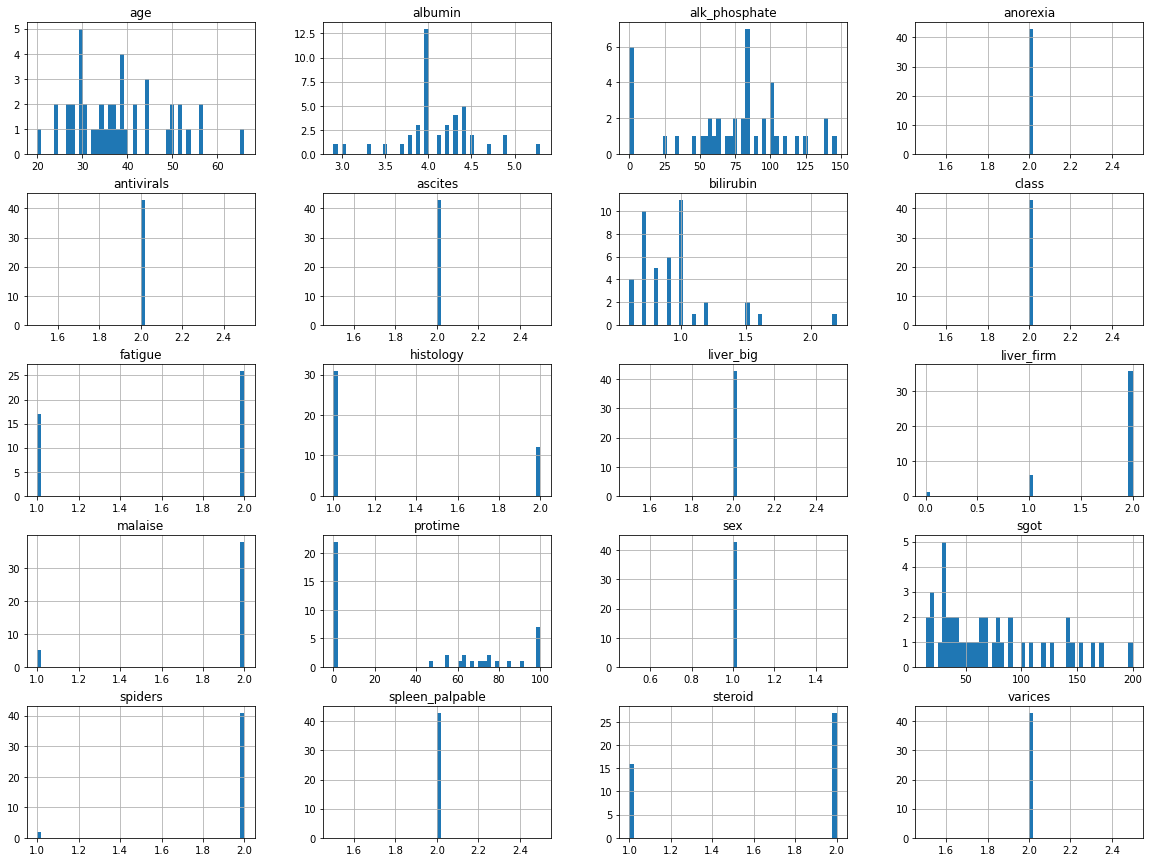

In [143]:
df_no_outlier.hist(bins=50, figsize=(20,15))
plt.show()

In [144]:
# Feature Selection and importance
## select KBest - strong relation with the output/input
## secursive feature elimination

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [145]:
xfeatures = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [146]:
ylabels = df['class']

In [147]:
skb = SelectKBest(score_func=chi2, k=10)
best_feature_fit =  skb.fit(xfeatures, ylabels)

In [149]:
# Highest scoreshows the best fit

print('Scores: ', best_feature_fit.scores_)

Scores:  [ 28.47481919   0.38948319   0.3995129    0.18634161   2.34643234
   2.46803203   0.19648065   0.31698209   0.9867095    0.74535155
   3.18940804   2.09639954   1.12812176  30.10247172  17.88270548
  47.38820795   6.87318606 130.18332457   3.01854675]


In [150]:
# Transform(optional) 

bf_02 = best_feature_fit.transform(xfeatures)
bf_02

array([[30. ,  2. ,  2. , ...,  4. ,  0. ,  1. ],
       [50. ,  1. ,  2. , ...,  3.5,  0. ,  1. ],
       [78. ,  1. ,  2. , ...,  4. ,  0. ,  1. ],
       ...,
       [61. ,  1. ,  1. , ...,  4.1,  0. ,  2. ],
       [53. ,  1. ,  2. , ...,  4.1, 48. ,  2. ],
       [43. ,  1. ,  2. , ...,  3.1, 42. ,  2. ]])

In [151]:
 feature_scores = pd.DataFrame(best_feature_fit.scores_, columns=['Feature_Scores'])

In [152]:
feature_scores

,Feature_Scores
0,28.474819
1,0.389483
2,0.399513
3,0.186342
4,2.346432
5,2.468032
6,0.196481
7,0.316982
8,0.986710
9,0.745352


In [153]:
feature_columns_names = pd.DataFrame(xfeatures.columns, columns=['Feature_name'])
best_feature_df = pd.concat([feature_scores, feature_columns_names], axis=1)

In [154]:
best_feature_df

,Feature_Scores,Feature_name
0,28.474819,age
1,0.389483,sex
2,0.399513,steroid
3,0.186342,antivirals
4,2.346432,fatigue
5,2.468032,malaise
6,0.196481,anorexia
7,0.316982,liver_big
8,0.986710,liver_firm
9,0.745352,spleen_palpable


In [155]:
# The higher the number the more important feature

best_feature_df.nlargest(12, 'Feature_Scores')

,Feature_Scores,Feature_name
17,130.183325,protime
15,47.388208,sgot
13,30.102472,bilirubin
0,28.474819,age
14,17.882705,alk_phosphate
16,6.873186,albumin
10,3.189408,spiders
18,3.018547,histology
5,2.468032,malaise
4,2.346432,fatigue


In [156]:
# Recursive Feature Elimination

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [157]:
logit = LogisticRegression()
rfe = RFE(logit, 8)

In [158]:
rfe_fit = rfe.fit(xfeatures, ylabels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [159]:
# Selection

selected_features = pd.DataFrame(rfe_fit.support_, columns=['Selected_Features']) 
ranking_features = pd.DataFrame(rfe_fit.ranking_, columns=['Ranking_Features']) 

In [160]:
rfe_feature_df = pd.concat([feature_columns_names, selected_features, ranking_features], axis=1)
rfe_feature_df

,Feature_name,Selected_Features,Ranking_Features
0,age,False,8
1,sex,True,1
2,steroid,False,5
3,antivirals,False,9
4,fatigue,True,1
5,malaise,True,1
6,anorexia,True,1
7,liver_big,False,4
8,liver_firm,False,6
9,spleen_palpable,False,7


In [161]:
# Checking for feature importance
'''
  Extra tree classifier
  Which feature is important
'''

'\n  Extra tree classifier\n  Which feature is important\n'

In [162]:
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier()
et_clf.fit(xfeatures, ylabels) 

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [163]:
print(et_clf.feature_importances_) # The more higher the more important

[0.05673183 0.02148704 0.02566788 0.01213269 0.02680881 0.04661434
 0.02353048 0.03846873 0.05448729 0.04213404 0.07660276 0.09398502
 0.05661723 0.10477074 0.06969313 0.05808621 0.07300017 0.05665616
 0.06252543]


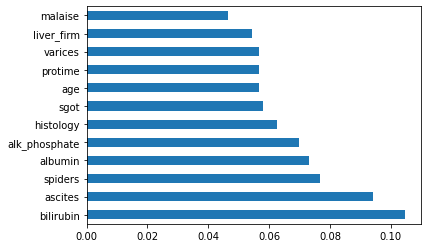

In [164]:
feature_importance_df = pd.Series(et_clf.feature_importances_, index=xfeatures.columns) 
feature_importance_df.nlargest(12).plot(kind='barh')

In [165]:
# Simple Correlation 

df.corr()

,class,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
class,1.000000,-0.219647,0.173051,0.121140,-0.130196,0.292206,0.315970,0.110715,0.102151,0.154736,0.180894,0.330194,0.332796,0.249610,-0.424523,-0.050806,-0.056679,0.296489,0.154688,-0.337856
age,-0.219647,1.000000,0.008126,-0.067710,-0.013100,-0.264635,-0.099516,0.100589,-0.126358,-0.100979,-0.127258,-0.206551,-0.125020,-0.114412,0.095626,0.045328,0.078021,-0.191174,-0.059956,0.170780
sex,0.173051,0.008126,1.000000,-0.039222,-0.089249,-0.063947,-0.020895,0.025186,0.023634,0.015750,-0.078414,-0.065592,0.049516,-0.005045,-0.039341,0.162851,-0.008991,-0.018906,0.067128,-0.137450
steroid,0.121140,-0.067710,-0.039222,1.000000,0.101657,0.146292,0.232041,0.084752,0.159877,0.095280,0.071401,0.029781,-0.002593,-0.029759,-0.005835,-0.042245,-0.021032,0.203109,0.032994,-0.070144
antivirals,-0.130196,-0.013100,-0.089249,0.101657,1.000000,-0.065578,-0.026703,-0.052554,-0.060626,-0.019871,-0.183070,-0.176367,-0.176382,-0.167721,0.177958,0.041764,0.095980,-0.153939,-0.276452,0.209242
fatigue,0.292206,-0.264635,-0.063947,0.146292,-0.065578,1.000000,0.617660,0.419991,0.168796,0.254621,0.226850,0.380935,0.288877,0.217311,-0.243964,-0.110505,-0.175476,0.198983,0.073783,-0.131177
malaise,0.315970,-0.099516,-0.020895,0.232041,-0.026703,0.617660,1.000000,0.631662,0.192556,0.197903,0.145236,0.376666,0.376182,0.267029,-0.269910,-0.114810,-0.177297,0.224605,0.067186,-0.116964
anorexia,0.110715,0.100589,0.025186,0.084752,-0.052554,0.419991,0.631662,1.000000,0.185164,0.144556,0.185004,0.371874,0.301514,0.288883,-0.244095,0.035984,-0.188183,0.133743,0.108322,-0.049702
liver_big,0.102151,-0.126358,0.023634,0.159877,-0.060626,0.168796,0.192556,0.185164,1.000000,0.698517,0.338963,0.370229,0.339108,0.238645,-0.028856,0.018895,-0.026293,0.105555,0.174677,-0.104757
liver_firm,0.154736,-0.100979,0.015750,0.095280,-0.019871,0.254621,0.197903,0.144556,0.698517,1.000000,0.322955,0.407114,0.310338,0.295100,-0.069352,-0.179977,-0.149876,0.059700,0.083312,-0.206632


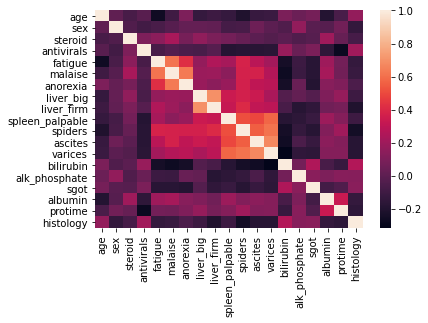

In [166]:
sn.heatmap(xfeatures.corr())

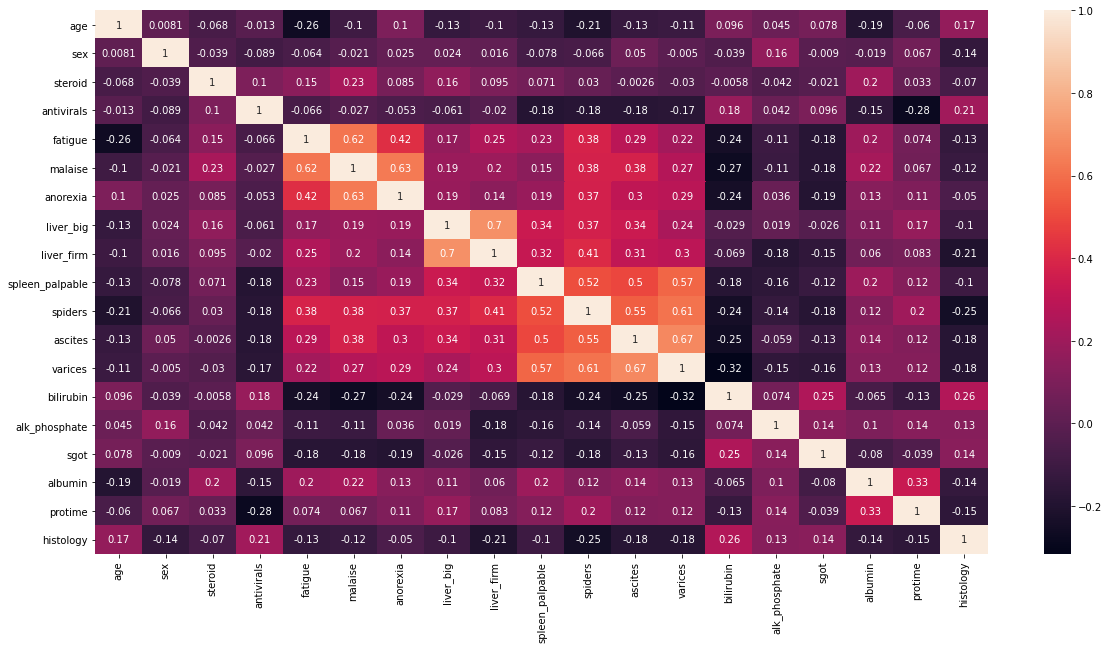

In [167]:
plt.figure(figsize=(20, 10))
sn.heatmap(xfeatures.corr(), annot=True)
plt.show()

In [168]:
# Model Building

'''
  Feature and Labels
  Train/Test/SPlit
  Logistic Regression
  RF
  DCT
  Serialize
'''

'\n  Feature and Labels\n  Train/Test/SPlit\n  Logistic Regression\n  RF\n  DCT\n  Serialize\n'

In [169]:
# ML Packages

from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [178]:
# Selected Features

best_feature_df.nlargest(12, 'Feature_Scores')['Feature_name'].unique()

array(['protime', 'sgot', 'bilirubin', 'age', 'alk_phosphate', 'albumin',
       'spiders', 'histology', 'malaise', 'fatigue', 'ascites', 'varices'],
      dtype=object)

In [179]:
df.columns

Index(['class', 'age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise',
       'anorexia', 'liver_big', 'liver_firm', 'spleen_palpable', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology'],
      dtype='object')

In [180]:
xfeatures_best = df[['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders',
       'ascites', 'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin',
       'protime', 'histology']]

In [181]:
# Training/Test dataset

X_train, X_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size= 0.3, random_state=7)

In [185]:
# Training/Test dataset for best_features

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(xfeatures_best, ylabels, test_size= 0.3, random_state=7)

In [186]:
# Build models

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
# Model Accuracy

logreg.score(X_test, y_test)

0.723404255319149

In [191]:
logreg.predict(X_test)

array([2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2])

In [195]:
print(list(y_test))

[2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2]


In [198]:
accuracy_score(y_test, logreg.predict(X_test)) # similar to the logreg.score value

0.723404255319149

In [202]:
# Build models

model = LogisticRegression()
model.fit(X_train_b, y_train_b)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [205]:
model.score(X_test_b, y_test_b) # similar results 

0.723404255319149

In [208]:
# Single Prediction

X_test.iloc[0]

age                 50.0
sex                  2.0
steroid              1.0
antivirals           2.0
fatigue              1.0
malaise              2.0
anorexia             2.0
liver_big            1.0
liver_firm           1.0
spleen_palpable      1.0
spiders              1.0
ascites              2.0
varices              2.0
bilirubin            0.9
alk_phosphate      230.0
sgot               117.0
albumin              3.4
protime             41.0
histology            2.0
Name: 90, dtype: float64

In [209]:
# Alternative Algo

clf = DecisionTreeClassifier()

In [213]:
clf.fit(X_train_b, y_train_b)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [214]:
clf.score(X_test_b, y_test_b)

0.7659574468085106

In [215]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

In [217]:
knn = KNeighborsClassifier(n_neighbors=3)

In [218]:
knn.fit(X_train_b, y_train_b)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [219]:
knn.score(X_test_b, y_test_b)

0.7446808510638298

In [220]:
# Save models

'''
  Serialization
  Pickle
  Joblib
  Numpy/json/ray
'''

'\n  Serialization\n  Pickle\n  Joblib\n  Numpy/json/ray\n'

In [221]:
import joblib

In [224]:
model_file = open('logistic_regression_hepB_model.pkl', 'wb')
joblib.dump(logreg, model_file)
model_file.close()

In [226]:
files.download('logistic_regression_hepB_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [229]:
model_file_knn = open('knn_hepB_model.pkl', 'wb')
joblib.dump(knn, model_file_knn)
model_file_knn.close()

In [230]:
files.download('knn_hepB_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [231]:
model_file_clf = open('clf_hepB_model.pkl', 'wb')
joblib.dump(knn, model_file_clf)
model_file_clf.close()

In [232]:
files.download('clf_hepB_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [233]:
# Create Decision Tree Plot

from IPython.display import Image
from sklearn import tree
import pydotplus

In [237]:
features_names_best = xfeatures_best.columns

In [238]:
target_names = ['Die', 'Live']

In [240]:
# Create dot plot

dot_data = tree.export_graphviz(clf, out_file=None, feature_names=features_names_best, class_names=target_names)

In [241]:
# Draw graph

graph = pydotplus.graph_from_dot_data(dot_data)

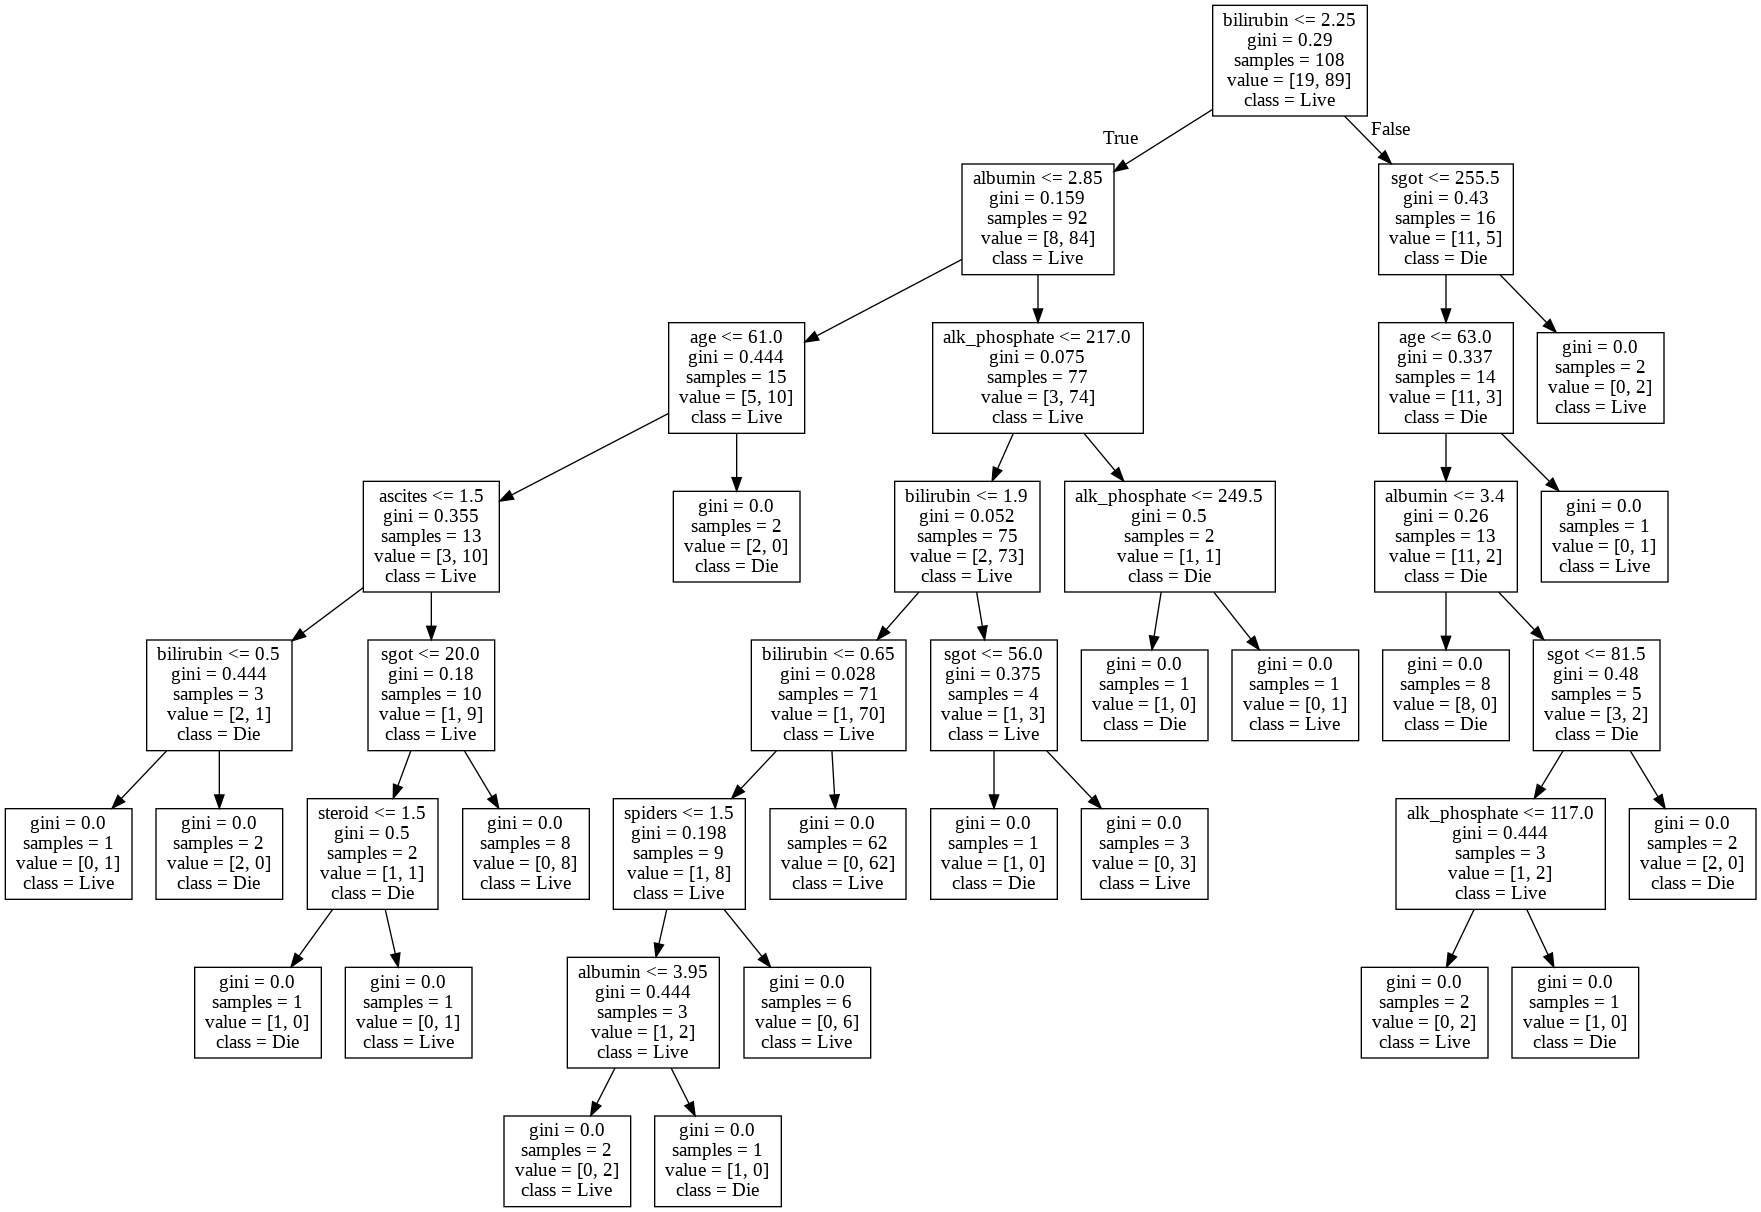

In [244]:
Image(graph.create_png())

In [245]:
graph.write_png('hep_decision_tree_plot.png')

True

In [246]:
files.download('hep_decision_tree_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [247]:
# Intrepret model and evaluate
'''
  Eli5
  Lime
  SHAP
  Skater
'''

'\n  Eli5\n  Lime\n  SHAP\n  Skater\n'

In [252]:
!pip install lime

     |████████████████████████████████| 276kB 3.4MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=e0c0ccd0717f3a0ea98d2302fa07057e15fd1b76f513d14cf31087398da31030
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [253]:
import lime
import lime.lime_tabular

In [255]:
# Create lime explainer
'''
  LimeTabularExplainer = Tables
  LimeTextExplainer = Text
  LimeImageExplainer = Images
'''

'\n  LimeTabularExplainer = Tables\n  LimeTextExplainer = Text\n  LimeImageExplainer = Images\n'

In [260]:
print(features_names_best)
print(target_names)

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology'],
      dtype='object')
['Die', 'Live']


In [261]:
class_names = ['Die(1)', 'Live(2)']

In [264]:
# Create Explainer

explainer = lime.lime_tabular.LimeTabularExplainer(X_train_b.values, feature_names=features_names_best, class_names=class_names, discretize_continuous=True)

In [267]:
exp = explainer.explain_instance(X_test_b.iloc[1], logreg.predict_proba, num_features=14, top_labels=1)

In [270]:
exp.show_in_notebook(show_table=True, show_all=False)

In [271]:
# Explain as list

exp.as_list()

[('bilirubin > 1.50', -0.4104952290290937),
 ('sex <= 1.00', -0.22721000067803837),
 ('spiders <= 1.00', -0.13565950004191168),
 ('histology <= 1.00', 0.10873450555958214),
 ('sgot > 90.50', 0.10401835974890113),
 ('alk_phosphate > 119.25', -0.09315414056769179),
 ('age > 50.25', -0.0542990618206352),
 ('protime <= 0.00', 0.04040751614388997),
 ('2.98 < albumin <= 4.00', 0.03880536209201489),
 ('1.50 < steroid <= 2.00', 0.03303507409559642),
 ('fatigue <= 1.00', 0.03145023181627122),
 ('ascites <= 2.00', 0.0),
 ('antivirals <= 2.00', 0.0),
 ('varices <= 2.00', 0.0)]

In [274]:
# Use Eli5

!pip install eli5

     |████████████████████████████████| 112kB 3.2MB/s 


In [275]:
import eli5

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [285]:
features_names_best = ['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology']

In [286]:
# Show how each feature contributes

eli5.show_weights(logreg, feature_names=features_names_best, target_names=class_names, top=10)

In [289]:
eli5.show_prediction(logreg, X_test_b.iloc[1], feature_names=features_names_best, target_names=class_names, top=10)

In [290]:
# Evaluation of models
'''
  Confusion Matrix
  Classfication Report
  Accuracy core
'''

'\n  Confusion Matrix\n  Classfication Report\n  Accuracy core\n'

In [292]:
from sklearn.metrics import confusion_matrix

In [293]:
y_pred = logreg.predict(X_test_b)

In [294]:
# Accuracy score

accuracy_score(y_test, y_pred)

0.723404255319149

In [295]:
# Use Confusion Matrix

confusion_matrix(y_test, y_pred)

array([[ 2, 11],
       [ 2, 32]])

In [296]:
# Plot

from sklearn.metrics import plot_confusion_matrix

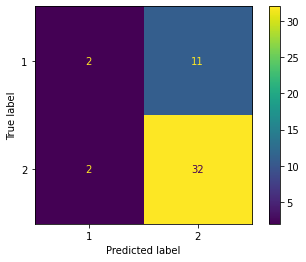

In [300]:
plot_confusion_matrix(logreg, X_test_b, y_test_b)

In [311]:
tp, tf, fn, tn = confusion_matrix(y_test, y_pred).ravel()

In [313]:
fn

2

In [306]:
# Classification Report

from sklearn.metrics import classification_report

In [308]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.15      0.24        13
           2       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [316]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      Die(1)       0.50      0.15      0.24        13
     Live(2)       0.74      0.94      0.83        34

    accuracy                           0.72        47
   macro avg       0.62      0.55      0.53        47
weighted avg       0.68      0.72      0.67        47



In [319]:
!pip install pandas_ml

     |████████████████████████████████| 102kB 2.5MB/s 
